# Clustering Case Study

**What do the instances that comprise the dataset represent?**

To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

**Additional Information**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.

data source : https://archive.ics.uci.edu/ml/datasets/seeds

Charytanowicz, Magorzata, Niewczas, Jerzy, Kulczycki, Piotr, Kowalski, Piotr & Lukasik, Szymon. (2012). seeds. UCI Machine Learning Repository.

# Import Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

from ipywidgets import interact
import plotly.io as pio
pio.renderers.default = 'iframe'
#pio.renderers.default = "colab"

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 3)
pd.options.display.float_format = '{:,.2f}'.format

# Ingest Data  

In [2]:
df = pd.read_csv("seeds_dataset.txt",header=None, delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,1
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,1
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,1
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,1


# EDA

## Implement basic steps to see how is your data looks like

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
df.shape

(210, 8)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum().any()

False

## Convert columns names and Map Class names

In [7]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')

In [8]:
df.columns  = ["area", "perimeter", "compactness", "length_of_kernel", "width_of_kernel", "assym_coef", "length_of_kernel_groove", "kernel_class" ]

In [9]:
df.columns 

Index(['area', 'perimeter', 'compactness', 'length_of_kernel',
       'width_of_kernel', 'assym_coef', 'length_of_kernel_groove',
       'kernel_class'],
      dtype='object')

In [10]:
df["kernel_class"] = df.kernel_class.map({1:"Kama", 2:"Rosa",3:"Canadian"})

In [11]:
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,Kama
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,Kama
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,Kama
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,Kama
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,Kama


## Visualy inspect the some features

In [15]:
def column_histogram(col):
    fig = px.histogram(df,
                       x=col,
                       )
    fig.show()
cols = df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

In [16]:
def column_histogram(col):
    fig = px.histogram(df,
                       x=col,
                       color="kernel_class",)
    fig.show()
cols = df.columns

interact(column_histogram,col=cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

In [17]:
def column_boxer(col):
    df[col].iplot("box",)
cols = df.columns    
interact(column_boxer,col = cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

In [18]:
def column_boxer1(col):
    fig = px.box(df,
                 color = "kernel_class",
                 y= col)
    fig.show() 
cols = df.columns    
interact(column_boxer1,col = cols);

interactive(children=(Dropdown(description='col', options=('area', 'perimeter', 'compactness', 'length_of_kern…

## Decriptive statistics

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,210.00,14.85,2.91,10.59,12.27,14.36,17.30,21.18
perimeter,210.00,14.56,1.31,12.41,13.45,14.32,15.71,17.25
compactness,210.00,0.87,0.02,0.81,0.86,0.87,0.89,0.92
length_of_kernel,210.00,5.63,0.44,4.90,5.26,5.52,5.98,6.67
width_of_kernel,210.00,3.26,0.38,2.63,2.94,3.24,3.56,4.03
assym_coef,210.00,3.70,1.50,0.77,2.56,3.60,4.77,8.46
length_of_kernel_groove,210.00,5.41,0.49,4.52,5.04,5.22,5.88,6.55


In [20]:
fig = px.imshow(df.corr(),
                height=1000,
                width=1000,
                range_color=[-1,1])
fig.show()

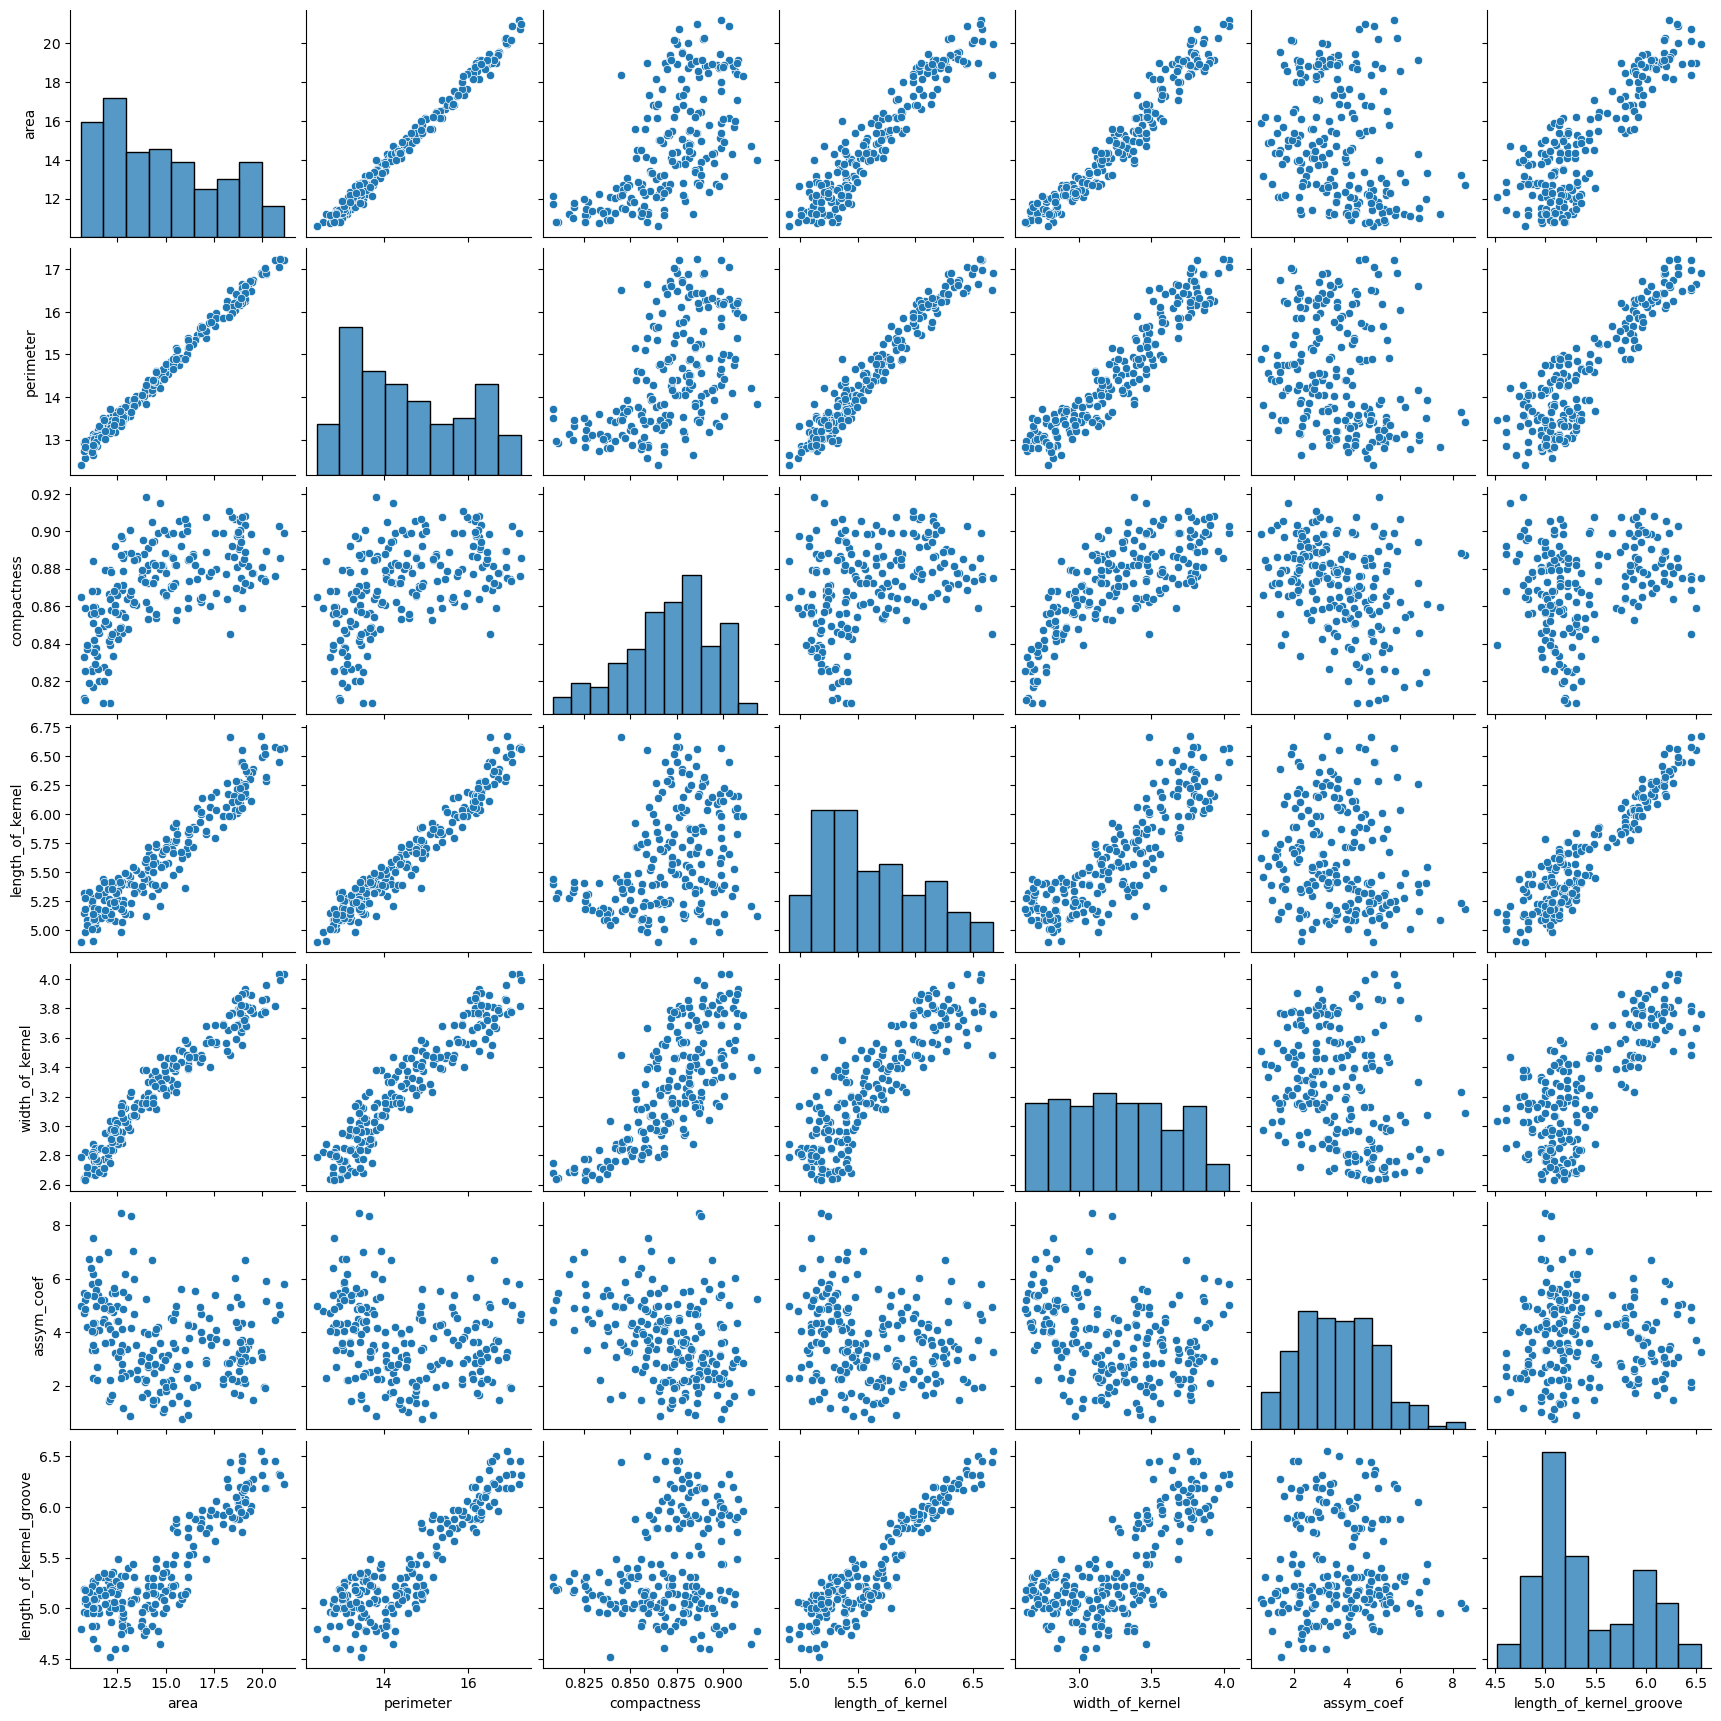

In [21]:
sns.pairplot(df);

# Data Preprocessing

## Drop the features that can't be used in clustering
* Hint:  there are no labels in clustering projects

In [22]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [23]:
X = df.drop(["kernel_class"], axis=1)

In [24]:
X

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17
...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04


In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [26]:
from typing import Union
from sklearn.neighbors import BallTree

def hopkins(data_frame: Union[np.ndarray, pd.DataFrame], sampling_size: int) -> float:
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """

    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)

    data_frame_sample = sample_observation_from_dataset(data_frame, sampling_size)

    sample_distances_to_nearest_neighbours = get_distance_sample_to_nearest_neighbours(
        data_frame, data_frame_sample
    )

    uniformly_selected_observations_df = simulate_df_with_same_variation(
        data_frame, sampling_size
    )

    df_distances_to_nearest_neighbours = get_nearest_sample(
        data_frame, uniformly_selected_observations_df
    )

    x = sum(sample_distances_to_nearest_neighbours)
    y = sum(df_distances_to_nearest_neighbours)

    if x + y == 0:
        raise Exception("The denominator of the hopkins statistics is null")

    return x / (x + y)[0]


def get_nearest_sample(df: pd.DataFrame, uniformly_selected_observations: pd.DataFrame):
    tree = BallTree(df, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    return uniformly_df_distances_to_nearest_neighbours


def simulate_df_with_same_variation(
    df: pd.DataFrame, sampling_size: int
) -> pd.DataFrame:
    max_data_frame = df.max()
    min_data_frame = df.min()
    uniformly_selected_values_0 = np.random.uniform(
        min_data_frame[0], max_data_frame[0], sampling_size
    )
    uniformly_selected_values_1 = np.random.uniform(
        min_data_frame[1], max_data_frame[1], sampling_size
    )
    uniformly_selected_observations = np.column_stack(
        (uniformly_selected_values_0, uniformly_selected_values_1)
    )
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(
                min_data_frame[i], max_data_frame[i], sampling_size
            )
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    return uniformly_selected_observations_df


def get_distance_sample_to_nearest_neighbours(df: pd.DataFrame, data_frame_sample):
    tree = BallTree(df, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    return data_frame_sample_distances_to_nearest_neighbours


def sample_observation_from_dataset(df, sampling_size: int):
    if sampling_size > df.shape[0]:
        raise Exception("The number of sample of sample is bigger than the shape of D")
    data_frame_sample = df.sample(n=sampling_size)
    return data_frame_sample

In [27]:
hopkins(X, X.shape[0])

0.186091319419766

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [28]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

In [29]:
ssd

[659.1717544870406,
 430.65897315130064,
 371.5811909715524,
 326.30618276116064,
 289.98412606307824,
 262.3496758683565,
 240.3236125944418,
 222.40079811171677]

In [30]:
pd.Series(ssd).diff()

0       NaN
1   -228.51
2    -59.08
3    -45.28
4    -36.32
5    -27.63
6    -22.03
7    -17.92
dtype: float64

In [31]:
fig = px.line(x = K, y = ssd, range_x=[1,10], hover_name = pd.Series(ssd).diff().values )

fig.show()

In [32]:
from yellowbrick.cluster import KElbowVisualizer

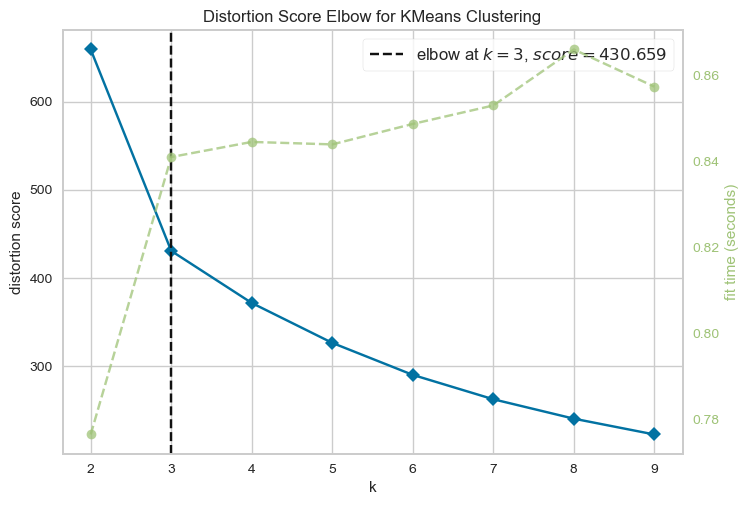

In [33]:
kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof();

### Model Building and label visualisation

In [34]:
model = KMeans(n_clusters=3,random_state=101)
model.fit(X)

KMeans(n_clusters=3, random_state=101)

In [35]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
df["cluster"] = model.labels_

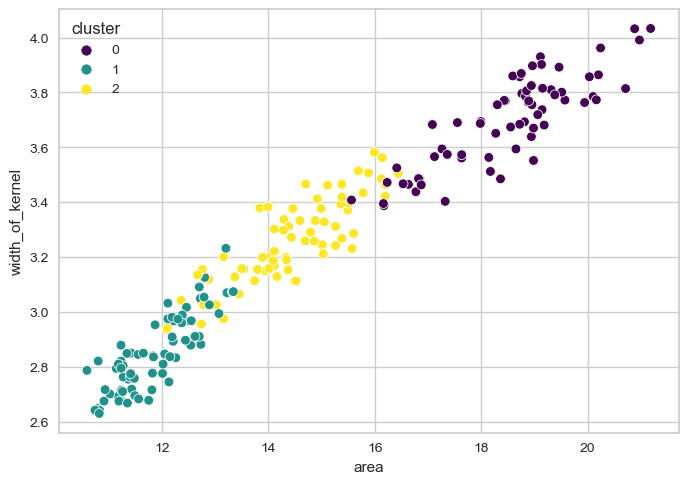

In [37]:
sns.scatterplot(x=df["area"], 
                y=df["width_of_kernel"], 
                hue= df.cluster, 
                palette= "viridis");

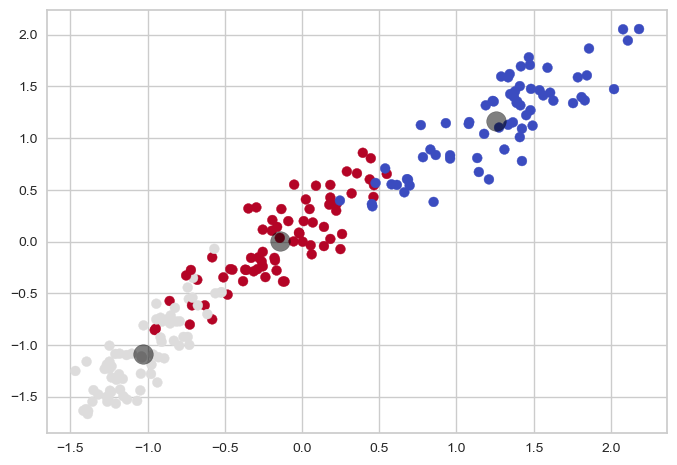

In [38]:
centroids = model.cluster_centers_

plt.scatter(X[:,0], X[:,4], c = df.cluster, s = 50, cmap = "coolwarm")
plt.scatter(centroids[:,0], centroids[:,4], c = "black", s = 200, alpha=0.5);

In [39]:
fig = px.scatter_3d(x=df["length_of_kernel_groove"],
                   y=df["width_of_kernel"],
                   z=df["length_of_kernel"],
                   color= df.cluster,
                   labels = {"x": "length_of_kernel_groove",
                             "y": "width_of_kernel",
                             "z": "length_of_kernel"},
                   hover_name= df["kernel_class"])

fig.show()

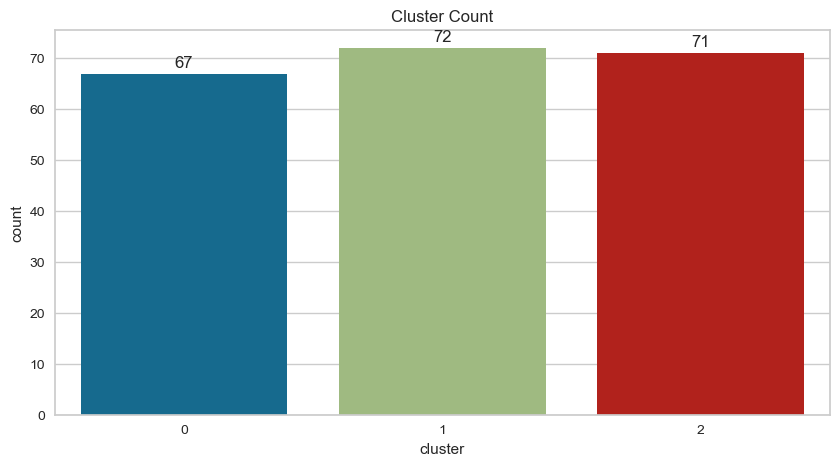

In [40]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [41]:
df[df["cluster"] == 0]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster
8,16.63,15.46,0.87,6.05,3.46,2.04,5.88,Kama,0
37,17.08,15.38,0.91,5.83,3.68,2.96,5.48,Kama,0
70,17.63,15.98,0.87,6.19,3.56,4.08,6.06,Rosa,0
71,16.84,15.67,0.86,6.00,3.48,4.67,5.88,Rosa,0
72,17.26,15.73,0.88,5.98,3.59,4.54,5.79,Rosa,0
...,...,...,...,...,...,...,...,...,...
131,18.94,16.32,0.89,6.14,3.83,2.91,5.95,Rosa,0
133,16.16,15.33,0.86,5.84,3.40,4.27,5.79,Rosa,0
134,15.56,14.89,0.88,5.78,3.41,4.97,5.85,Rosa,0
136,17.36,15.76,0.88,6.14,3.57,3.53,5.97,Rosa,0


In [42]:
pd.crosstab(df.kernel_class,df.cluster) # 1--17, 2--16, 3--16, 4--17

cluster,0,1,2
kernel_class,,,
Canadian,0,66,4
Kama,2,6,62
Rosa,65,0,5


### Evaluate 

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
print(f'Silhouette Score(n=3): {silhouette_score(X, df.cluster)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=3): 0.40072705527512986


In [45]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.46577247686580914
For n_clusters=3, the silhouette score is 0.40072705527512986
For n_clusters=4, the silhouette score is 0.3369008229710853
For n_clusters=5, the silhouette score is 0.2863816249628832
For n_clusters=6, the silhouette score is 0.27930886443779596
For n_clusters=7, the silhouette score is 0.2825195561066108
For n_clusters=8, the silhouette score is 0.251137716662038


In [46]:
 from sklearn.metrics.cluster import adjusted_rand_score as ari

In [47]:
kmeans_ari = ari(df["kernel_class"], df.cluster)
kmeans_ari

0.7732937360806309

## Hierarchical Clustering

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

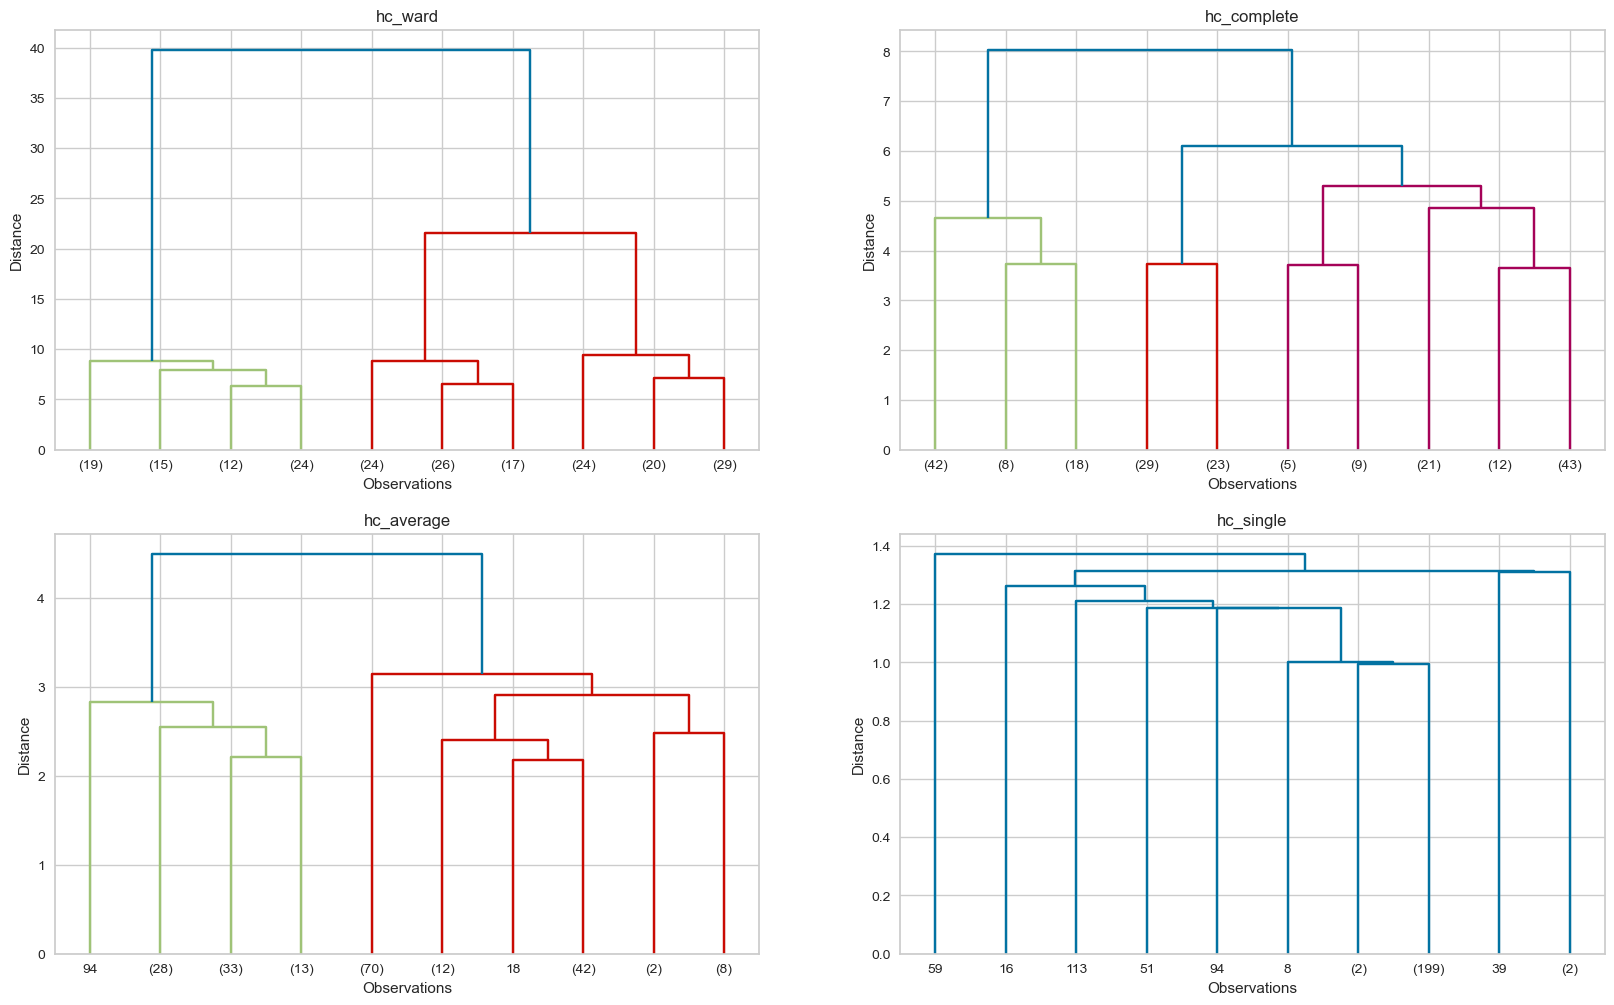

In [49]:
linkage_dict = {"hc_ward" : linkage(y = X, method = "ward"),
                "hc_complete" : linkage(X, "complete"),
                "hc_average" : linkage(X, "average"),
                "hc_single" : linkage(X, "single")}

plot_list = list(range(221,225))

plt.figure(figsize = (20,12))

for _plot, (title, method) in zip(plot_list, linkage_dict.items()):
    plt.subplot(_plot)
    plt.title(title)
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(method,truncate_mode = "lastp", p = 10, leaf_font_size = 10)

### Model Building and label visualisation

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [52]:
df["cluster_1"] = model1.labels_

In [53]:
fig = px.scatter_3d(x=df["length_of_kernel_groove"],
                   y=df["width_of_kernel"],
                   z=df["length_of_kernel"],
                   color= df.cluster,
                   labels = {"x": "length_of_kernel_groove",
                             "y": "width_of_kernel",
                             "z": "length_of_kernel"},
                   hover_name= df["kernel_class"])

fig.show()

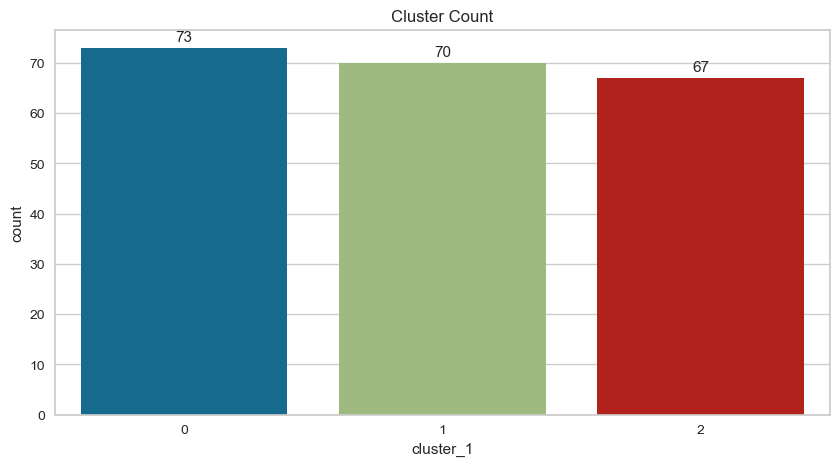

In [54]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_1)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [55]:
pd.crosstab(df.kernel_class,df.cluster_1) # 1--17, 2--15, 3--16, 4--17

cluster_1,0,1,2
kernel_class,,,
Canadian,5,0,65
Kama,64,4,2
Rosa,4,66,0


### Evaluate 

In [56]:
print(f'Silhouette Score(n=4): {silhouette_score(X, df.cluster_1)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.3926339709101015


In [57]:
agglo_ari = ari(df["kernel_class"], df.cluster_1)
agglo_ari

0.796998283593012

In [58]:
kmeans_ari,  silhouette_score(X, df.cluster)

(0.7732937360806309, 0.40072705527512986)

# Feature Engineering (PCA)

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

new_X = pca.fit_transform(X)

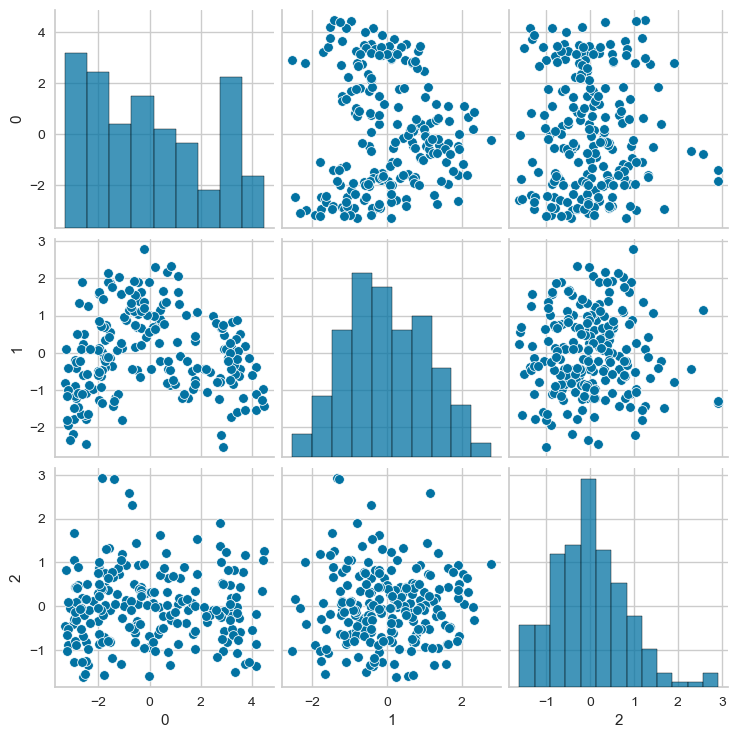

In [60]:
sns.pairplot(pd.DataFrame(new_X));

In [61]:
hopkins(new_X, new_X.shape[0])

0.35152796949212645

## Kmeans with PCA

In [62]:
model = KMeans(n_clusters=3,random_state=42)
model.fit(new_X)

KMeans(n_clusters=3, random_state=42)

In [63]:
pd.crosstab(df["kernel_class"],model.labels_) # 1--17, 2--15, 3--16, 4--17

col_0,0,1,2
kernel_class,,,
Canadian,66,0,4
Kama,5,2,63
Rosa,0,65,5


In [64]:
fig = px.scatter_3d(x=new_X[:,0],
                   y=new_X[:,1],
                   z=new_X[:,2],
                   color= model.labels_,
                   labels = {"x": "first comp.",
                             "y": "second comp.",
                             "z": "third comp."},
                   hover_name= df["kernel_class"])

fig.show()

### Evaluate 

In [65]:
df["pca_cluster"] = model.labels_

In [66]:
print(f'Silhouette Score(n=3): {silhouette_score(new_X, df.pca_cluster)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=3): 0.4100823639350388


In [67]:
agglo_ari = ari(df["kernel_class"], df.pca_cluster)
agglo_ari

0.7850359051341558

In [68]:
kmeans_ari,  silhouette_score(new_X, df.pca_cluster)

(0.7732937360806309, 0.4100823639350388)

## Hierarchical with PCA

In [69]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [70]:
pd.crosstab(df["kernel_class"], model1.labels_) # # 1--17, 2--15, 3--16, 4--16

col_0,0,1,2
kernel_class,,,
Canadian,5,0,65
Kama,64,1,5
Rosa,5,65,0


In [71]:
fig = px.scatter_3d(x=new_X[:,0],
                   y=new_X[:,1],
                   z=new_X[:,2],
                   color= model1.labels_,
                   labels = {"x": "first comp.",
                             "y": "second comp.",
                             "z": "third comp."},
                   hover_name= df["kernel_class"])

fig.show()

### Evaluate 

In [72]:
df["pca_cluster1"] = model1.labels_

In [73]:
print(f'Silhouette Score(n=3): {silhouette_score(new_X, df.pca_cluster1)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=3): 0.40314992196781263


In [74]:
agglo_ari = ari(df["kernel_class"], df.pca_cluster1)
agglo_ari

0.784382796580442

In [75]:
kmeans_ari,  silhouette_score(new_X, df.pca_cluster1)

(0.7732937360806309, 0.40314992196781263)

# DBSCAN (optional)

In [76]:
from sklearn.cluster import DBSCAN


In [77]:
np.linspace(0.1,2,20)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [78]:
z=0
for i in np.linspace(0.1,2,20) :
    for x in range(1,10):
        model2 = DBSCAN(eps=i,min_samples=x)
        if pd.Series(model2.fit_predict(X)).nunique() == 3:
            print(i,x)
            #break

0.8999999999999999 3
0.8999999999999999 7
0.8999999999999999 8
0.8999999999999999 9
0.9999999999999999 2
0.9999999999999999 7
0.9999999999999999 8
0.9999999999999999 9
1.0999999999999999 2
1.2 2
1.3 2


In [79]:
model2 = DBSCAN()


In [80]:
model2.fit_predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1], dtype=int64)

In [81]:
df["cluster_2"] = model2.labels_

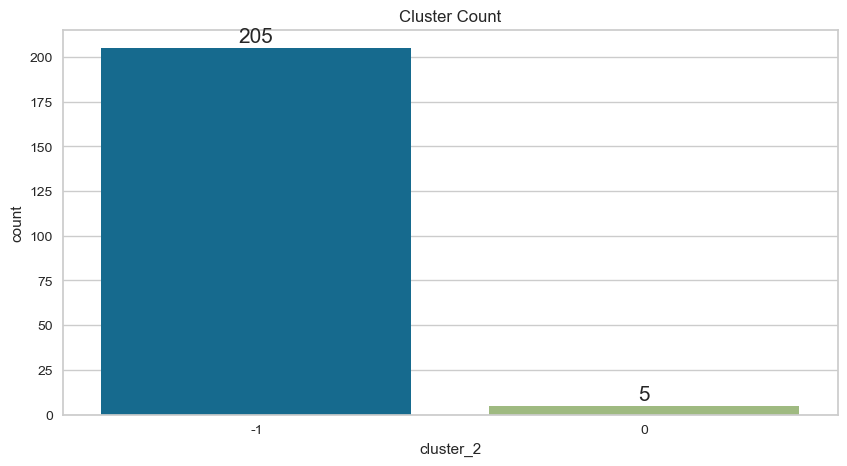

In [82]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_2)
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show();

In [83]:
df[df["cluster_2"]==0]

,area,perimeter,compactness,length_of_kernel,width_of_kernel,assym_coef,length_of_kernel_groove,kernel_class,cluster,cluster_1,pca_cluster,pca_cluster1,cluster_2
91,18.76,16.20,0.90,6.17,3.80,3.12,6.05,Rosa,0,1,1,1,0
92,18.81,16.29,0.89,6.27,3.69,3.24,6.05,Rosa,0,1,1,1,0
106,18.85,16.17,0.91,6.15,3.81,2.84,6.20,Rosa,0,1,1,1,0
118,18.89,16.23,0.90,6.23,3.77,3.64,5.97,Rosa,0,1,1,1,0
131,18.94,16.32,0.89,6.14,3.83,2.91,5.95,Rosa,0,1,1,1,0


# GAUSSIAN MIXTURE (Optional)

In [84]:
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture


In [85]:
model3 = GaussianMixture(n_components=3,n_init=3, covariance_type="full", random_state=42)

In [86]:
model3.fit_predict(new_X)

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [87]:
df["cluster_3"] = model3.fit_predict(new_X)

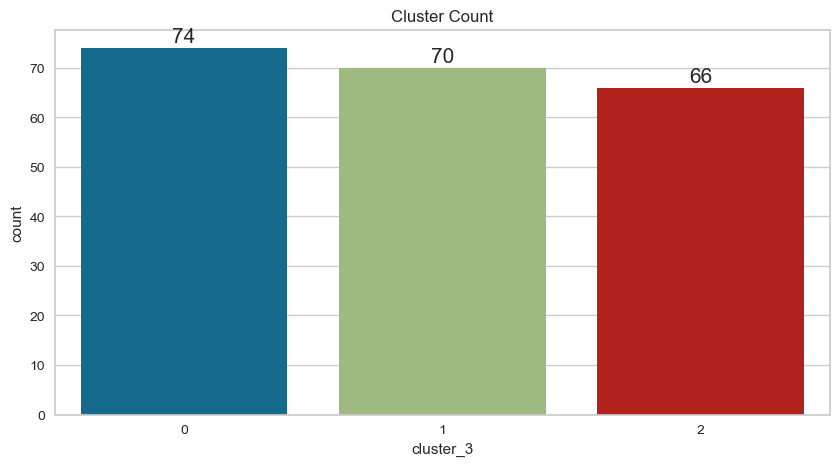

In [88]:
plt.figure(figsize=(10,5))
plt.title("Cluster Count")
ax = sns.countplot(x = df.cluster_3)
#ax.bar_label(ax.containers[0])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.show();

In [89]:
pd.crosstab(df["kernel_class"], df["cluster_3"])

cluster_3,0,1,2
kernel_class,,,
Canadian,67,0,3
Kama,7,4,59
Rosa,0,66,4


In [90]:
pd.DataFrame(model3.predict_proba(new_X)).iplot(kind="bar")